<a href="https://colab.research.google.com/github/vardanagarwal/crowd_counting/blob/master/ShanghaiTech_crowd_counting_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import zipfile
zf = zipfile.ZipFile('/content/drive/My Drive/ShanghaiTech_Crowd_Counting_Dataset.zip', "r")
zf.extractall()

In [0]:
# import scipy.io as io
# import cv2
# from matplotlib import pyplot as plt
# from matplotlib.pyplot import imread

# mat = io.loadmat('part_B_final/train_data/ground_truth/GT_IMG_1.mat')
# points = mat['image_info'][0,0][0,0][0]
# img = imread('part_B_final/train_data/images/IMG_1.jpg', 'RGB')
# img_copy = img.copy()

In [0]:
# for point in points:
#     cv2.circle(img_copy, (int(point[0]), int(point[1])), 3, (0, 255, 0), -1)
# plt.imshow(img)
# plt.figure()
# plt.imshow(img_copy)
# plt.show()

In [0]:
import h5py
import PIL as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
from scipy import spatial
import scipy.io as io
import json
from matplotlib import cm as CM
import scipy

In [0]:
def gaussian_filter_density(gt):
    #Generates a density map using Gaussian filter transformation
    
    density = np.zeros(gt.shape, dtype=np.float32)
    
    gt_count = np.count_nonzero(gt)
    
    if gt_count == 0:
        return density

    # FInd out the K nearest neighbours using a KDTree
    
    pts = np.array(list(zip(np.nonzero(gt)[1].ravel(), np.nonzero(gt)[0].ravel())))
    leafsize = 2048
    
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    
    # query kdtree
    distances, locations = tree.query(pts, k=4)

        
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        
        #Convolve with the gaussian filter
        
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    
    return density

In [4]:
part_A_train = os.path.join('part_A_final/train_data','images')
part_A_test = os.path.join('part_A_final/test_data','images')
part_B_train = os.path.join('part_B_final/train_data','images')
part_B_test = os.path.join('part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test,part_B_train,part_B_test]
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
print(len(img_paths))

1198


In [0]:
from tqdm import tqdm

i = 0
for img_path in tqdm(img_paths):
        
    
    # Load sparse matrix
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    
    #Read image
    img = plt.imread(img_path)
    
    # Create a zero matrix of image size
    k = np.zeros((img.shape[0],img.shape[1]))
    
    gt = mat["image_info"][0,0][0,0][0]
    
    #Generate hot encoded matrix of sparse matrix
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    
    # generate density map
    k = gaussian_filter_density(k)
    
    # File path to save density map
    file_path = img_path.replace('.jpg','.h5').replace('images','ground')
    file_path = os.path.join('drive/My Drive/ShanghaiTech_h5', file_path) 
    
    with h5py.File(file_path, 'w') as hf:
            hf['density'] = k

In [0]:
# gt = points
# k = np.zeros((img.shape[0],img.shape[1]))
# for i in range(0,len(gt)):
#         if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
#             k[int(gt[i][1]),int(gt[i][0])]=1
    
# # generate density map

# k = gaussian_filter_density(k)

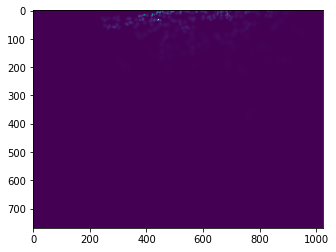

226.65642

In [11]:
# plt.imshow(k)
# plt.show()
# np.sum(k)


Sum =  226.65642


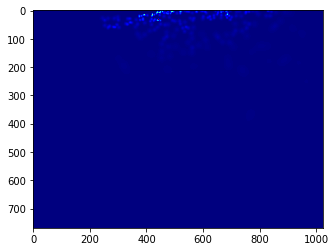

In [12]:
# file_path = 'gt_density.h5'
# with h5py.File(file_path, 'w') as hf:
#         hf['density'] = k
# gt_file = h5py.File(file_path,'r')
# groundtruth = np.asarray(gt_file['density'])
# plt.imshow(groundtruth,cmap=CM.jet)
# print("Sum = " ,np.sum(groundtruth))

In [13]:
# points.shape

(234, 2)